# Title: Add title here
*2023 datathon and conference on Efficient Data Analysis for the Condition Assessment of Bridges*

**Author(s):** Add author name here

**Affiliation(s):** Add author affiliation here



## Abstract
Write abstract here.

## Content
Write the main body of Notebook text below this point.

### Headings and subheadings
To break your document into sections use "##" for section headings and "###" for section subheadings. 

To write *italic* text, enclose the text in "\*". 

To write **bold** text, enclose the text in "\*\*".

### Bullet points and numbered lists

- This is an example of a bullet point.
- This is another example of a bullet point.
    - This is an example of a subpoint

1. This is an example of a numbered list.
1. This continues the numbered list.
    1. This is an example of a nested list.
    1. This is a further subpoint.

### Including equations in Jupyter Notebooks
Notebooks use *LaTex* text formatting. Equations can be written inline, such as $e=mc^2$, or as seperate equation blocks as shown below.

$$y = Ax+C$$

### Including hyperlinks in Jupyter Notebooks
We can include hyperlinks through combinations of square and rounded brackets like [this](https://blogs.ed.ac.uk/edacab/).

### Including tables in Jupyter Notebooks
Tables use the notation shown below:

| Column 1 | Column 2 | Column 3 |
| --- | --- | --- |
| Value 1 | Description 1  | A note |
| Value 2 | Description 2  | A much longer note to demonstrate how columns expand as needed |
| Value 3 | Description 3  | A third note.|
| Value 4 | Description 4  | A further note |

### Including images in Jupyter Notebooks

To include images we upload them to the notebook and reference them using the HTML code shown below.

<div><center>
    <img src="./Example_Image.JPG" width="25%"/>
</center></div>

### Further help
For further guidance on writing Jupter Notebooks refer to [this guide](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html) or [this summary](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet).

## Adding Python code to Jupyter Notebooks
To add Python code to Jupyter notebooks we define a new *code block*. This block behaves like a typical Python interpreter, allowing us to import Python libraries, write function, or define variables. An example block of code is shown below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def example_function(input_data):
    output_data = input_data**2
    return output_data

dat = np.arange(100)
output_dat = example_function(dat)
print('The first ten output values are: '+str(output_dat[:10]))

The first ten output values are: [ 0  1  4  9 16 25 36 49 64 81]


Any variables or functions we have previously defined in carry over to future code blocks, as shown below.

In [3]:
print('The first ten output values are still: '+str(output_dat[:10]))

The first ten output values are still: [ 0  1  4  9 16 25 36 49 64 81]


We can plot figures inline to help demonstrate relationships between variables.

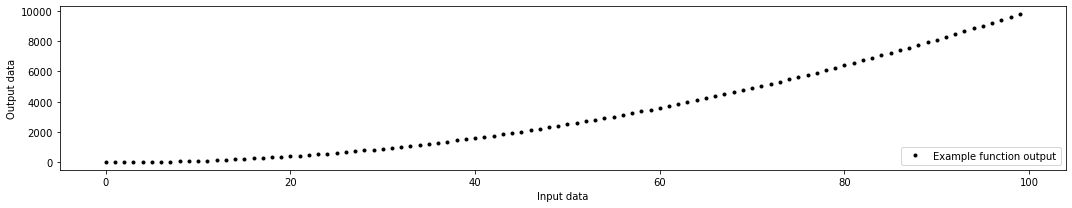

In [4]:
fg,ax = plt.subplots(figsize=(15,3))
ax.plot(dat,output_dat,'k.',label='Example function output')
ax.set_ylabel('Output data')
ax.set_xlabel('Input data')
ax.legend(loc=4)
fg.tight_layout()

## Accessing the LT2 footbridge datasets

The block of code below downloads the data for the period where the bridge was loaded by a single pedestrian. The data is hosted on GitHub and can be accessed via the URL shown below.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url = "https://edacab.readthedocs.io/en/latest/Welcome_page_and_tutorials/_static/LT2_Bridge_unloaded.csv" # URL of data for when bridge is loaded by a single pedestrian

data = pd.read_csv(url,index_col=0,parse_dates=True) # Load the data from the .csv file to a Pandas dataframe
fs = 170.77 # Sampling frequency of data in Hz

### Exploring the footbridge datasets
The data is organized with each column of the dataframe being the output from an accelerometer channel. The names of the accelerometer channels are shown below. The first two values of each accelerometer channel name correspond to the accelerometer location plotted in the previous section. The last value of the accelerometer channel name is the direction of movement: Z corresponds to vertical acceleration responses, X corresponds to transverse acceleration responses.

In [3]:
print(data.columns) # Print the name of the accelerometer channels (the column headings in the dataframe)

Index(['A2Z', 'A2X', 'A5X', 'A5Z', 'A3X', 'A3Z', 'A1Z', 'A1X', 'A6X', 'A6Z',
       'A4X', 'A4Z'],
      dtype='object')


### Plotting the footbridge datasets
#### Raw data plots
The block of code below plots the raw acceleration output for accelerometer channel A2Z. In the plotted data we can see each of the pedestrian crossings. These crossings were from a single pedestrian walking at a variety of speeds and following various crossing paths.

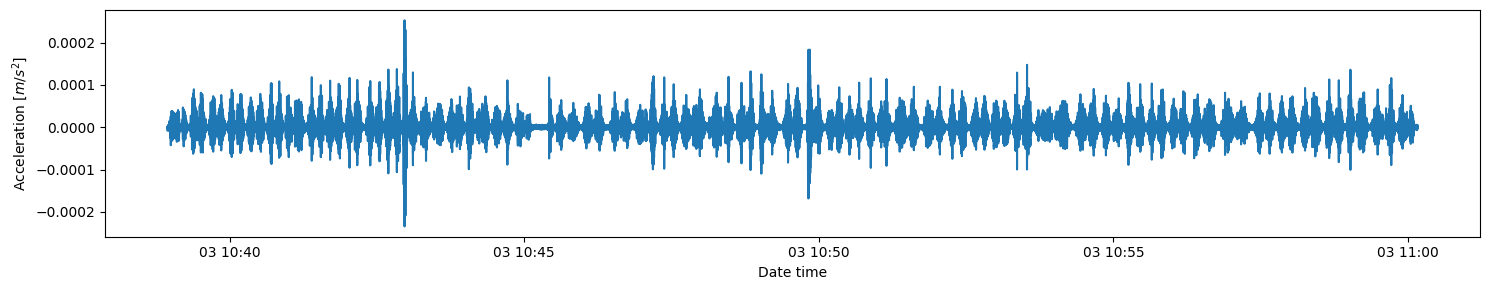

In [4]:
fg,ax = plt.subplots(figsize=(15,3))
ax.plot(data['A2Z'])
ax.set_ylabel('Acceleration [$m/s^2$]')
ax.set_xlabel('Date time')
fg.tight_layout()

#### Plotting Welch power spectral density
The block of code below plots the 30-second Welch averaged power spectral density of each accelerometer channel. The dynamic behaviour of the bridge is complex, with many peaks in the frequency spectra. The data is slightly corrupted by the 50Hz electrical mains signal alongside the frequency roll-off due to filtering and downsampling of the data.

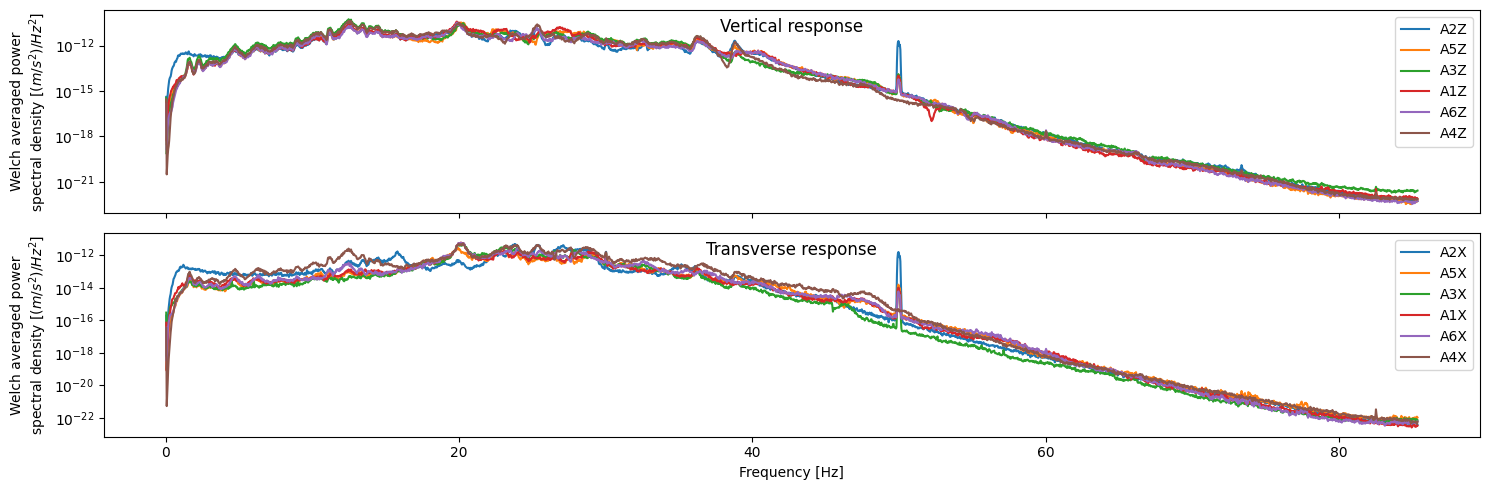

In [5]:
from scipy.signal import welch

fg,ax = plt.subplots(2,sharex='all',figsize=(15,5)) # Create an empty plot with two subplots that share an x-axis

# Cycle through all columns of dataframe and calculate Welch power spectral density and plot it
for channel in data.columns:
    f,psd = welch(data[channel],fs=fs,nperseg=30*fs) # Calculate 30 second Welch power spectral density (PSD)

    if "Z" in channel:
        ax[0].semilogy(f[1:],psd[1:],label=channel) # Plotting vertical acceleration PSDs in top plot
    else:
        ax[1].semilogy(f[1:],psd[1:],label=channel) # Plotting transverse acceleration PSDs in lower plot
ax[0].set_title('Vertical response',y=0.85) # Set title for top plot
ax[1].set_title('Transverse response',y=0.85) # Set title for lower plot
ax[0].set_ylabel('Welch averaged power\nspectral density [$(m/s^2)/Hz^2$]') # Label y-axis of top plot
ax[1].set_ylabel('Welch averaged power\nspectral density [$(m/s^2)/Hz^2$]') # Label y-axis of lower plot
ax[1].set_xlabel('Frequency [Hz]') # Label x-axis of lower plot
ax[0].legend(loc=1) # Add a legend to top plot
ax[1].legend(loc=1) # Add a legend to lower plot
fg.tight_layout() # Remove any unnecessary white space from plot

### Comparing unloaded and static loaded bridge behaviour
Also collected at the same time as data from the LT2 footbridge excited by a single pedestrian was acceleration data when there was a static load of 60kg located at various positions on the bridge. Identifying changes in dynamic behaviour of civil structures under loading is a useful excercise as these methods can be used to [identify damage to the structure](https://doi.org/10.1016/j.engstruct.2021.113745). The block of code below loads and plots the data from when the bridge was loaded with the 60kg mass.

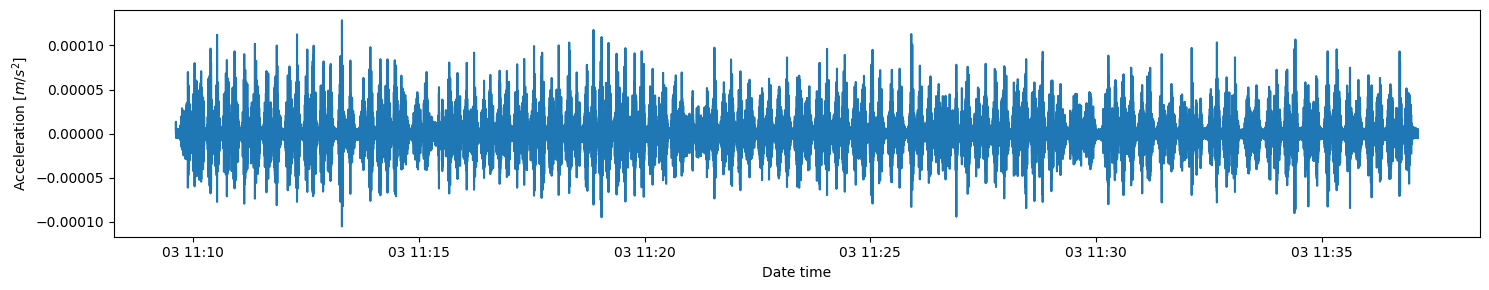

In [6]:
url = "https://edacab.readthedocs.io/en/latest/Welcome_page_and_tutorials/_static/LT2_Bridge_60kg_load.csv"

data_60kg = pd.read_csv(url,index_col=0,parse_dates=True)
fs = 170.77 # Sampling frequency in Hz

fg,ax = plt.subplots(figsize=(15,3))
ax.plot(data_60kg['A2Z'])
ax.set_ylabel('Acceleration [$m/s^2$]')
ax.set_xlabel('Date time')
fg.tight_layout()

During this period the 60kg mass is moved to a variety of locations along the bridge deck. The block of code below reloads the unloaded data and plots the Welch power spectral density of both datasets to show how the additional 60kg mass impacts the natural frequencies and damping ratios of the structure.

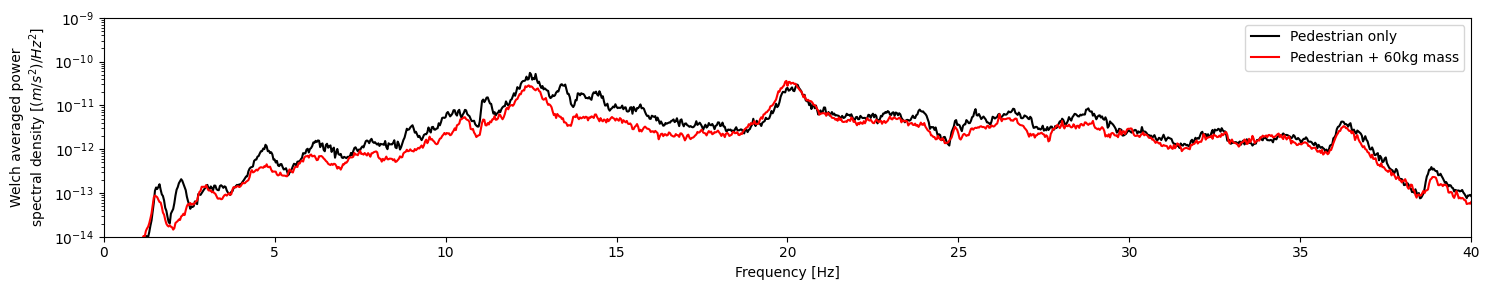

In [7]:
from scipy.signal import welch

url = "https://edacab.readthedocs.io/en/latest/Welcome_page_and_tutorials/_static/LT2_Bridge_unloaded.csv"

data = pd.read_csv(url,index_col=0,parse_dates=True)

f,psd_unloaded = welch(data['A3Z'],fs=fs,nperseg=30*fs)
f,psd_60kg_load = welch(data_60kg['A3Z'],fs=fs,nperseg=30*fs)

fg,ax = plt.subplots(figsize=(15,3))
ax.semilogy(f[1:],psd_unloaded[1:],'k',label='Pedestrian only')
ax.semilogy(f[1:],psd_60kg_load[1:],'r',label='Pedestrian + 60kg mass')
ax.set_ylabel('Welch averaged power\nspectral density [$(m/s^2)/Hz^2$]')
ax.set_xlabel('Frequency [Hz]')
ax.legend(loc=1)
ax.set_ylim(10e-15,10e-10)
ax.set_xlim(0,40)
fg.tight_layout()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9df15425-03c5-4773-8629-248ddacc836e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>